<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [ ]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository


# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
# Read data in pandas

df = pd.read_csv('transfusion.data')

# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Perform EDA by investigating each of the points above 
df = df.rename(columns={'Recency (months)': 'recency', 'Frequency (times)': 'frequency', 'Monetary (c.c. blood)': 'monetary', 'Time (months)': 'time', 'whether he/she donated blood in March 2007': 'donated'})

print('Columns: %s' % df.columns)
print("\n" 'Data types: %s' % df.dtypes)
print("\n" 'Null values: %s' % df.isnull().sum())

Columns: Index(['recency', 'frequency', 'monetary', 'time', 'donated'], dtype='object')

Data types: recency      int64
frequency    int64
monetary     int64
time         int64
donated      int64
dtype: object

Null values: recency      0
frequency    0
monetary     0
time         0
donated      0
dtype: int64


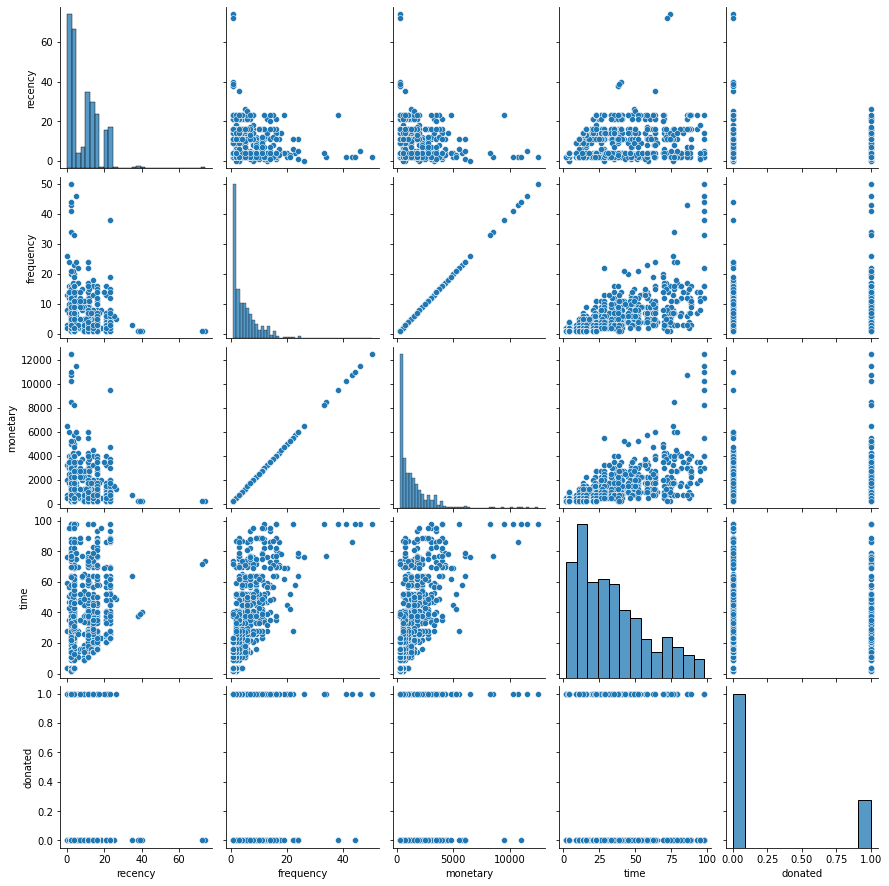

In [4]:
sns.pairplot(df)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [5]:
# Filter/subset/clean the data according to your EDA findings
print(df.recency.value_counts())

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: recency, dtype: int64


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
frequency,748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
monetary,748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
time,748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
donated,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


<AxesSubplot:>

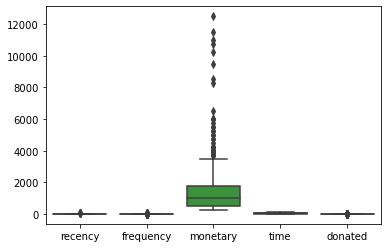

In [53]:
sns.boxplot(data=df)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [6]:
# Split your data
feature_cols = ['recency', 'frequency', 'monetary', 'time']
target_col = 'donated'

X = df[feature_cols]
y = df[target_col]

test_size = X.shape[0] - 500

In [13]:
scaler = StandardScaler()

Xs = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [14]:
# Choose a model or models
model = RandomForestClassifier()
print(model)

RandomForestClassifier()


# Step 9: Fit the Model

In [15]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [16]:
# Evaluate model against training set
print('Training score = %s' % model.score(X_train, y_train))

y_train_pred = model.predict(X_train)

print('Accuracy score = %f' %accuracy_score(y_train, y_train_pred))
print('Precision score = %f' %precision_score(y_train, y_train_pred))
print('Recall score = %f' %recall_score(y_train, y_train_pred))
print('ROC/AUC score = %f' %roc_auc_score(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

Training score = 0.936
Accuracy score = 0.936000
Precision score = 0.917431
Recall score = 0.813008
ROC/AUC score = 0.894568
[[368   9]
 [ 23 100]]


# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [40]:
# Evaluate model against test set
print('Test score = %s' % model.score(X_test, y_test))

y_test_pred = model.predict(X_test)

print('Accuracy score = %f' %accuracy_score(y_test, y_test_pred))
print('Precision score = %f' %precision_score(y_test, y_test_pred))
print('Recall score = %f' %recall_score(y_test, y_test_pred))
print('ROC/AUC score = %f' %roc_auc_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

Test score = 0.7701612903225806
Accuracy score = 0.770161
Precision score = 0.481481
Recall score = 0.472727
ROC/AUC score = 0.663825
[[165  28]
 [ 29  26]]


Scaled Data:

Accuracy 75

ROC 61

In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       193
           1       0.48      0.47      0.48        55

    accuracy                           0.77       248
   macro avg       0.67      0.66      0.66       248
weighted avg       0.77      0.77      0.77       248



In [42]:
Y_pp = pd.DataFrame(model.predict_proba(X_test), columns=['class_0_pp','class_1_pp'])
Y_pp.head(10)

,class_0_pp,class_1_pp
0,0.930000,0.070000
1,1.000000,0.000000
2,0.204167,0.795833
3,0.962324,0.037676
4,1.000000,0.000000
5,0.652833,0.347167
6,0.300000,0.700000
7,0.882833,0.117167
8,1.000000,0.000000
9,0.882833,0.117167


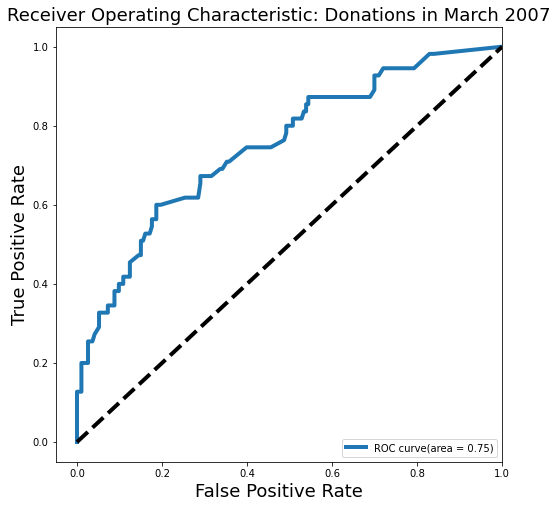

In [39]:
fpr, tpr, _ = roc_curve(y_test, Y_pp['class_1_pp'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: Donations in March 2007', fontsize=18)
plt.legend(loc="lower right")
plt.show()

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
I have modelled to predict with 77% accuracy who has donated blood in March of 2007.

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



